### Imort Required Libraries

In [10]:
import os
import pydicom  
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import dicom2nifti
import cv2

### Load a DICOM File

In [11]:
# Load the DICOM image 
dicom_file_path = 'C:/Users/deepanshu.sharma/OneDrive - Plaksha University/Desktop/DT/Lab_2_data/x_ray/x1.dicom'  # Replace with your DICOM file path
dicom_data = pydicom.dcmread(dicom_file_path)
# Extract image data
image = dicom_data.pixel_array

### Image Scaling

In [12]:
# Scale the pixel values of the image to a 0-255 range. 
image_norm = (image - np.min(image)) / (np.max(image) - np.min(image)) *255 #min-max scaler

image_norm = np.uint8(image_norm) #convert the image to uint8 for proper visualization


### Applying Sobel Edge Detection

In [13]:
# Define Sobel kernels
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

# Apply Sobel filter in the x direction
sobel_x_result = ndimage.convolve(image_norm, sobel_x)

# Apply Sobel filter in the y direction
sobel_y_result = ndimage.convolve(image_norm, sobel_y)

# Compute the magnitude of gradients
sobel_mag = np.sqrt(sobel_x_result**2 + sobel_y_result**2)

### Display the results

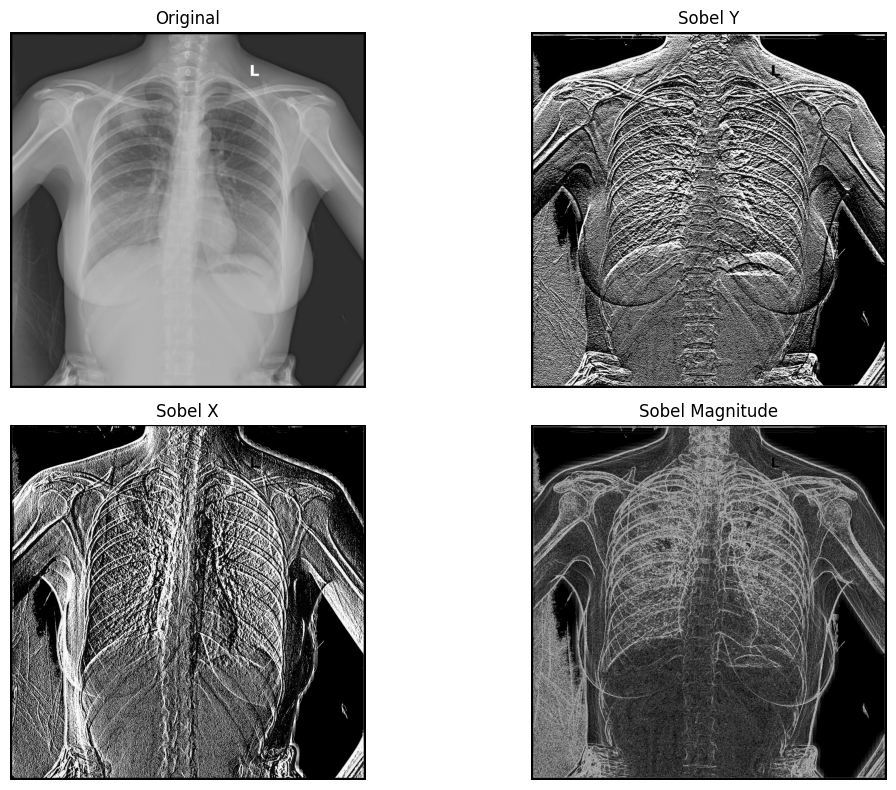

In [14]:
# Display the results using matplotlib
fig = plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Original')
plt.imshow(image_norm, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Sobel Y')
plt.imshow(sobel_y_result, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Sobel X')
plt.imshow(sobel_x_result, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Sobel Magnitude')
plt.imshow(sobel_mag, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
fig.savefig("D:/lab2.png")

In [28]:
import numpy as np
import cv2
import pydicom
import matplotlib.pyplot as plt

# Load the DICOM image
dicom_file_path = 'C:/Users/deepanshu.sharma/OneDrive - Plaksha University\Desktop/DT/Lab_2_data/Mammogram/m1.dcm'  # Replace with your DICOM file path
dicom_data = pydicom.dcmread(dicom_file_path)

# Extract image data
image = dicom_data.pixel_array

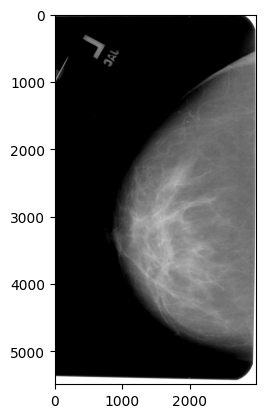

In [29]:
plt.imshow(image, cmap = 'gray')

### Normalize the image 

In [30]:
# Normalize the image to the range 0-255 through cv2.
image_normalized = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
image_normalized = np.uint8(image_normalized)


### Apply thresholding

In [37]:
# Apply thresholding to create a binary image
_, binary_image = cv2.threshold(image_normalized, 0, 255, cv2.THRESH_BINARY)


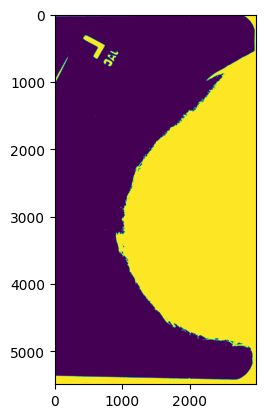

In [38]:
blur = cv2.GaussianBlur(image_normalized, (5,5), 0)
_, th2 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(th2)

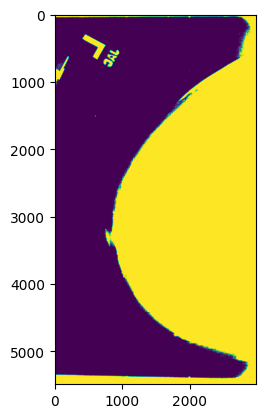

In [32]:
plt.imshow(binary_image)

### Extract the contours and select the largest contour in the binarized image. 

In [39]:
# Find contours
contours, _ = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour by area
if contours:
    largest_contour = max(contours, key=cv2.contourArea)
else:
    largest_contour = np.array([])


In [40]:
contours

(array([[[2903, 5047]],
 
        [[2902, 5048]],
 
        [[2901, 5048]],
 
        [[2900, 5049]],
 
        [[2902, 5051]],
 
        [[2903, 5051]],
 
        [[2904, 5050]],
 
        [[2904, 5048]]], dtype=int32),
 array([[[2864, 4954]],
 
        [[2864, 4955]],
 
        [[2865, 4955]]], dtype=int32),
 array([[[2845, 4950]],
 
        [[2846, 4950]]], dtype=int32),
 array([[[2886, 4949]],
 
        [[2885, 4950]]], dtype=int32),
 array([[[2806, 4940]]], dtype=int32),
 array([[[2813, 4935]],
 
        [[2814, 4935]]], dtype=int32),
 array([[[2802, 4931]],
 
        [[2802, 4934]],
 
        [[2803, 4935]],
 
        [[2807, 4935]],
 
        [[2807, 4934]],
 
        [[2806, 4933]],
 
        [[2806, 4932]],
 
        [[2805, 4931]]], dtype=int32),
 array([[[2726, 4929]]], dtype=int32),
 array([[[2797, 4926]],
 
        [[2796, 4927]],
 
        [[2797, 4928]],
 
        [[2798, 4928]],
 
        [[2799, 4927]],
 
        [[2799, 4926]]], dtype=int32),
 array([[[2545, 4914]],
 

### Mask the largest contour and apply the mask to the original image

In [41]:

# Create a mask with the same dimensions as the image
mask = np.zeros_like(binary_image)

# Draw the largest contour on the mask
if largest_contour.size > 0:
    cv2.drawContours(mask, [largest_contour], -1, (1), thickness=cv2.FILLED)


# Apply the mask to the original image
masked_image = cv2.bitwise_and(image_normalized, image_normalized, mask=mask)


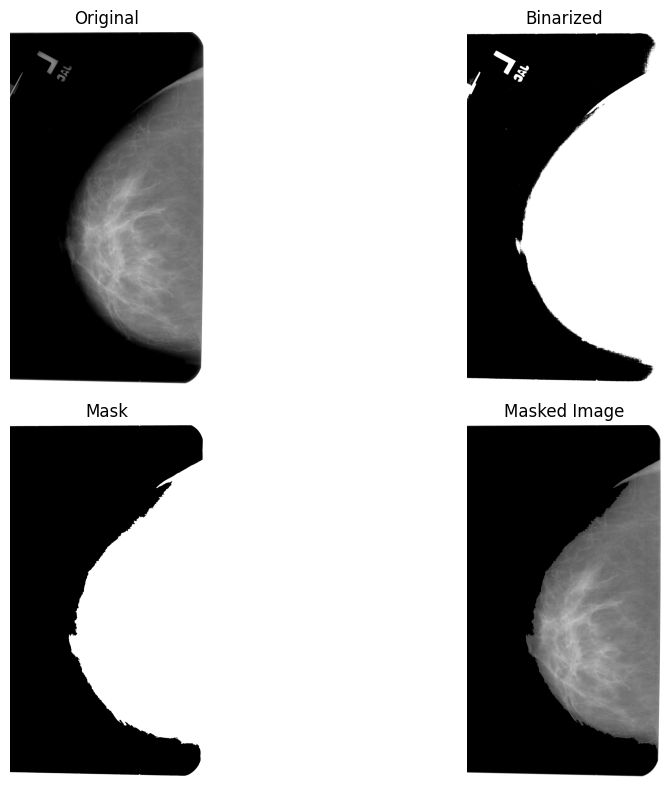

In [42]:
# Display the results using matplotlib
fig = plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Original')
plt.imshow(image_normalized, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Binarized')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Masked Image')
plt.imshow(masked_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
fig.savefig("D:/add.png")

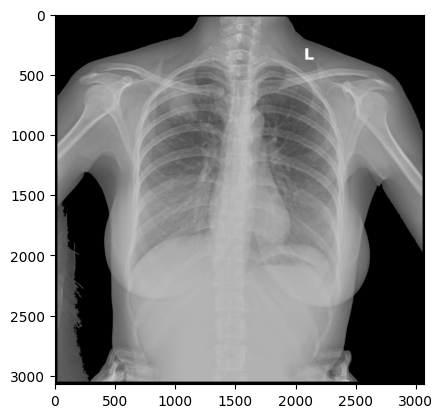

In [23]:
plt.imshow(masked_image, cmap = 'gray')

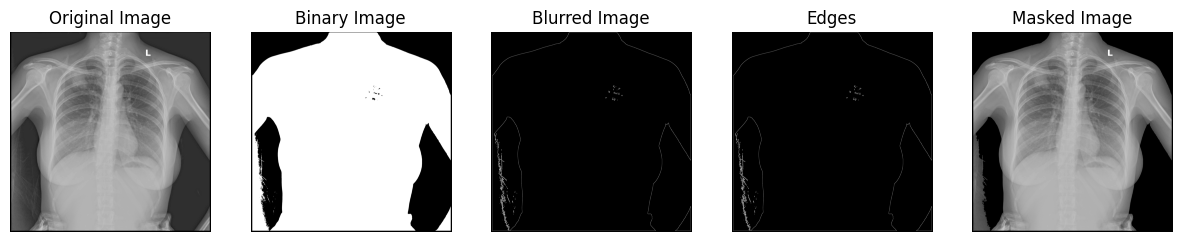

In [24]:

# Display the results
plt.figure(figsize=(15, 10))

plt.subplot(1, 5, 1)
plt.title('Original Image')
plt.imshow(image_normalized, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.title('Binary Image')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.title('Blurred Image')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.title('Edges')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.title('Masked Image')
plt.imshow(masked_image, cmap='gray')
plt.axis('off')

plt.show()